# DRAW PLOTS
Possible kind: `GLITCH`, `MULTI_GLITCH` and `NO_GLITCH`

In [13]:
%matplotlib inline

# Reading files
import h5py
import toml

# Scientific computing
import numpy as np
import pandas as pd

# Plot
import matplotlib.pyplot as plt; #plt.xkcd()
import seaborn as sns
sns.set()
sns.set_context('notebook')

# Other
import os
import subprocess
from random import choice
import time as pytime
from IPython.display import display, clear_output

# Suppress NaturalNameWarning raised by HDFStore
import warnings
import tables
warnings.filterwarnings('ignore', category=tables.NaturalNameWarning)

Select kind and number.

In [14]:
kind = 'NO_GLITCH'
number = 100

kind_2 = 'GLITCH'
number_2 = 42

In [27]:
with pd.HDFStore('../classification/ris/OUT-classified.h5', mode='r') as data:
    print(pd.DataFrame(data[kind_2 + '/' + str(number_2)].to_numpy()).to_csv(sep=';'))

;0
0;-1.0635700300706212
1;-0.8241383024984883
2;-1.6283765750188222
3;-0.17722618385771782
4;-1.4679236028426443
5;-0.4855402030178966
6;1.67318123539355
7;0.798185098975579
8;-0.3421554720575355
9;1.020546271061313
10;-0.3585979564906676
11;0.4468874936195344
12;0.8985867413280939
13;-1.2323577803211656
14;0.06842745039711762
15;-0.19629284337677566
16;-0.07184989030063904
17;1.4412053765907988
18;-1.0523723578765947
19;-0.43263034809190826
20;0.28440188719646375
21;0.20541646716202733
22;0.06451751921661475
23;-1.2350338379128403
24;58.81204927732203
25;34.72871500243984
26;6.408742034206322
27;14.85602536641781
28;-0.43577744500833515
29;8.648309865659721
30;-1.8320036390809469
31;4.3421833697441645
32;-2.671026102720292
33;3.4766253011249266
34;-2.0506831074798297
35;2.4695479728937686
36;-1.1296215703661323
37;1.347489430656679
38;0.5874535905839418
39;0.1016037160433445
40;-0.7734144310877835
41;2.075170730843887
42;-1.4267136653723678
43;-0.43551023551177925
44;-0.0280553351088

Print and save the plot.

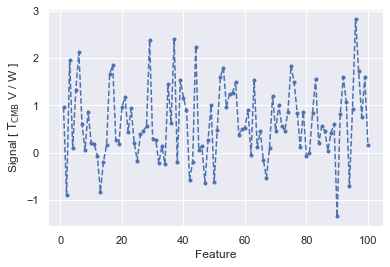

In [12]:
with pd.HDFStore('../classification/ris/OUT-classified.h5', mode='r') as data:
    d_target = data[kind + '/' + str(number)]
    #d_target_2 = data[kind_2 + '/' + str(number_2)]

#plt.rcParams["font.family"] = "serif"
#plt.rcParams["mathtext.fontset"] = "dejavuserif"

plt.plot(range(1,101), d_target['data']+3, marker='.', linestyle='dashed')
#plt.plot(range(1,101), np.roll(d_target_2['data']+3, 50, axis=-1), marker='.', linestyle='dashed')
plt.xlabel('Feature')
plt.ylabel(r'Signal [ $\mathrm{T}_\mathrm{CMB}$ V / W ]')
plt.savefig('glitch_n3.png', dpi=600)

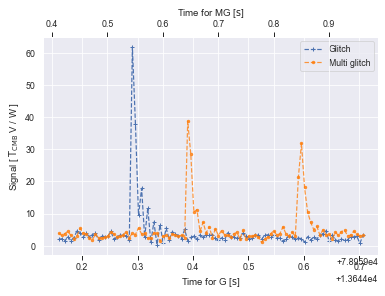

In [4]:
with pd.HDFStore('../classification/ris/OUT-classified.h5', mode='r') as data:
    d_target = data[kind + '/' + str(number)]
    d_target_2 = data[kind_2 + '/' + str(number_2)]

fig, ax1 = plt.subplots()

lns1 = ax1.plot(d_target_2.index, d_target_2['data']+3, marker='+', linestyle='dashed', label='Glitch')
ax1.set_xlabel(r'Time for G [$\mathrm{s}$]')

ax1.set_ylabel(r'Signal [ $\mathrm{T}_\mathrm{CMB}$ V / W ]')

ax2 = ax1.twiny() # ax1 and ax2 share y-axis
lns2 = ax2.plot(d_target.index, d_target['data']+3, marker='.', linestyle='dashed', color=u'#ff7f0e', alpha=0.8, label='Multi glitch')
ax2.set_xlabel(r'Time for MG [$\mathrm{s}$]')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#plt.savefig('G_MG_ds.pdf')